<a href="https://colab.research.google.com/github/rajiv-ranjan/cds-mini-projects/blob/rajiv-playpen/m2/mini-project-1/M2_NB_MiniProject_1_LinearRegression_Regularization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Advanced Certification Program in Computational Data Science
## A program by IISc and TalentSprint
### Mini-Project: Linear Regression with Regularization

## Problem Statement

Predict the bike-sharing counts per hour based on the features including weather, day, time, humidity, wind speed, season e.t.c.

## Learning Objectives

At the end of the mini-project, you will be able to :

* perform data exploration and visualization
* implement linear regression using sklearn and optimization
* apply regularization on regression using Lasso, Ridge and Elasticnet techniques
* calculate and compare the MSE value of each regression technique
* analyze the features that are best contributing to the target

### Dataset

The dataset chosen for this mini-project is [Bike Sharing Dataset](https://archive.ics.uci.edu/ml/datasets/bike+sharing+dataset).  This dataset contains the hourly and daily count of rental bikes between the years 2011 and 2012 in the capital bike share system with the corresponding weather and seasonal information. This dataset consists of 17389 instances of 16 features.

Bike sharing systems are a new generation of traditional bike rentals where the whole process from membership, rental and return has become automatic. Through these systems, the user can easily rent a bike from a particular position and return to another position. Currently, there are about over 500 bike-sharing programs around the world which is composed of over 500 thousand bicycles. Today, there exists great interest in these systems due to their important role in traffic, environmental and health issues.

Apart from interesting real world applications of bike sharing systems, the characteristics of data being generated by these systems make them attractive for the research. As opposed to other transport services such as bus or subway, the duration of travel, departure and arrival position are explicitly recorded in these systems. This feature turns bike sharing system into a virtual sensor network that can be used for sensing mobility in the city. Hence, it is expected that the most important events in the city could be detected via monitoring these data.

<img src="https://s26551.pcdn.co/wp-content/uploads/2012/02/resize-va-sq-bikeshare.jpg" alt="drawing" width="400"/>

### Data Fields

* dteday - hourly date
* season - 1:winter, 2:spring, 3:summer, 4:fall
* hr - hour
* holiday - whether the day is considered a holiday
* workingday - whether the day is neither a weekend nor holiday
* weathersit -<br>
    1 - Clear, Few clouds, Partly cloudy, Partly cloudy <br>
    2 - Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist<br>
    3 - Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds<br>
    4 - Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog<br>   
* temp - temperature in Celsius
* atemp - "feels like" temperature in Celsius
* humidity - relative humidity
* windspeed - wind speed
* casual - number of non-registered user rentals initiated
* registered - number of registered user rentals initiated
* cnt - number of total rentals

## Information

**Regularization:** It is a form of regression that shrinks the coefficient estimates towards zero. In other words, this technique discourages learning a more complex or flexible model, to avoid the risk of overfitting. A simple relation for linear regression looks like this.

$Y ≈ β_0 + β_1 X_1 + β_2 X_2 + …+ β_p X_p$

 Here $Y$ represents the learned relation and $β$ represents the coefficient estimates for different variables or predictors(X).

 If there is noise in the training data, then the estimated coefficients won’t generalize well to the future data. This is where regularization comes in and shrinks or regularizes these learned estimates towards zero.

Below are the Regularization techniques:

 * Ridge Regression
 * Lasso Regression
 * Elasticnet Regression

## Grading = 10 Points

In [577]:
# # @title Download the dataset
# !wget -qq https://cdn.iisc.talentsprint.com/CDS/MiniProjects/Bike_Sharing_Dataset.zip
# !unzip Bike_Sharing_Dataset.zip



In [578]:
from utility import download_and_unzip, basic_data_details

download_and_unzip(
    filename="Bike_Sharing_Dataset.zip",
    url="https://cdn.iisc.talentsprint.com/CDS/MiniProjects/Bike_Sharing_Dataset.zip",
)


False

#### Importing Necessary Packages

In [579]:
# Loading the Required Packages
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score
import scipy
from sklearn.preprocessing import add_dummy_feature
from sklearn.linear_model import LinearRegression


### Data Loading

In [580]:
# Read the hour.csv file
# YOUR CODE HERE
df = pd.read_csv("hour.csv")


print the first five rows of dataset

In [581]:
basic_data_details(df)



---------------------------------------------
Shape of the data: (17379, 17)
---------------------------------------------

---------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 

instant      dteday  season  yr  mnth  hr  holiday  weekday  \
0            1  2011-01-01       1   0     1   0        0        6   
1            2  2011-01-01       1   0     1   1        0        6   
2            3  2011-01-01       1   0     1   2        0        6   
3            4  2011-01-01       1   0     1   3        0        6   
4            5  2011-01-01       1   0     1   4        0        6   
...        ...         ...     ...  ..   ...  ..      ...      ...   
17374    17375  2012-12-31       1   1    12  19        0        1   
17375    17376  2012-12-31       1   1    12  20        0        1   
17376    17377  2012-12-31       1   1    12  21        0        1   
17377    17378  2012-12-31       1   1    12  22        0        1   
17378    17379  2012-12-31       1   1    12  23        0        1   

       workingday  weathersit  temp   atemp   hum  windspeed  casual  \
0               0           1  0.24  0.2879  0.81     0.0000       3   
1               0           1  0.22  0.2727  0.80     0.0000       8   
2               0           1  0.22  0.2727  0.80     0.0000       5   
3               0           1  0.24  0.2879  0.75     0.0000       3   
4               0           1  0.24  0.2879  0.75     0.0000       0   
...           ...         ...   ...     ...   ...        ...     ...   
17374           1           2  0.26  0.2576  0.60     0.1642      11   
17375           1           2  0.26  0.2576  0.60     0.1642       8   
17376           1           1  0.26  0.2576  0.60     0.1642       7   
17377           1           1  0.26  0.2727  0.56     0.1343      13   
17378           1           1  0.26  0.2727  0.65     0.1343      12   

       registered  cnt  
0              13   16  
1              32   40  
2              27   32  
3              10   13  
4               1    1  
...           ...  ...  
17374         108  119  
17375          81   89  
17376          83   90  
17377          48   61  
17378          37   49  

[17379 rows x 17 columns]

In [582]:
# YOUR CODE HERE
df.head(n=5)


instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32  
3           1  0.24  0.2879  0.75        0.0       3          10   13  
4           1  0.24  0.2879  0.75        0.0       0           1    1

print the datatypes of the columns

In [583]:
# YOUR CODE HERE
df.dtypes


instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [584]:
df.shape


(17379, 17)

In [585]:
# check if the values are valid
hr_value = df["hr"].unique()
hr_value


array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23])

In [586]:
df["hr"].agg(["nunique", "count"])
# [df['hr'==x].count for x in hr_value]


nunique       24
count      17379
Name: hr, dtype: int64

### Task flow with respect to feature processing and model training

* Explore and analyze the data

* Identify continuous features and categorical features

* Apply scaling on continuous features and one-hot encoding on categorical features

* Separate the features, targets and split the data into train and test

* Find the coefficients of the features using normal equation and find the cost (error)

* Apply batch gradient descent technique and find the best coefficients

* Apply SGD Regressor using sklearn

* Apply linear regression using sklearn

* Apply Lasso, Ridge, Elasticnet Regression

### EDA &  Visualization ( 2 points)

#### Visualize the hour (hr) column with an appropriate plot and find the busy hours of bike sharing

In [587]:
# df.describe()


In [588]:
# do we have same number of records for all the hours
hr_unique_with_count = df["hr"].value_counts()
hr_unique_with_count
hr_unique_with_count.info()
hr_unique_count = hr_unique_with_count.to_list()
hr_unique_values = hr_unique_with_count.index.to_list()
print(hr_unique_values, hr_unique_count)


<class 'pandas.core.series.Series'>
Index: 24 entries, 17 to 3
Series name: count
Non-Null Count  Dtype
--------------  -----
24 non-null     int64
dtypes: int64(1)
memory usage: 384.0 bytes
[17, 16, 13, 15, 14, 12, 22, 21, 20, 19, 18, 23, 11, 10, 9, 8, 7, 0, 6, 1, 5, 2, 4, 3] [730, 730, 729, 729, 729, 728, 728, 728, 728, 728, 728, 728, 727, 727, 727, 727, 727, 726, 725, 724, 717, 715, 697, 697]


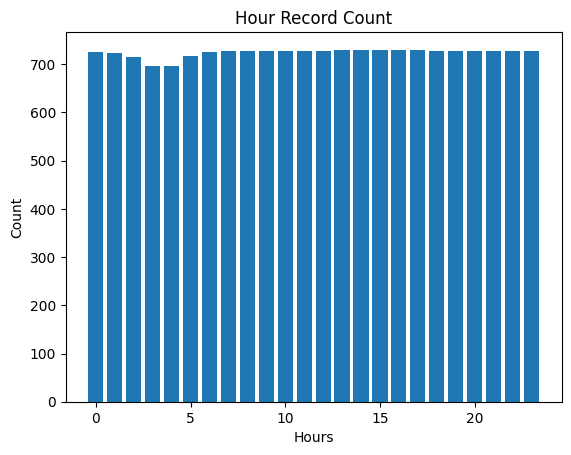

In [589]:
# YOUR CODE HERE
plt.bar(hr_unique_values, hr_unique_count)
plt.title("Hour Record Count")
plt.xlabel("Hours")
plt.ylabel("Count")
plt.show()


In [590]:
# busy hours is the total bikes out on the road per hour
hourly_count = df.groupby("hr")["cnt"].sum()
hourly_count.head(n=5)


hr
0    39130
1    24164
2    16352
3     8174
4     4428
Name: cnt, dtype: int64

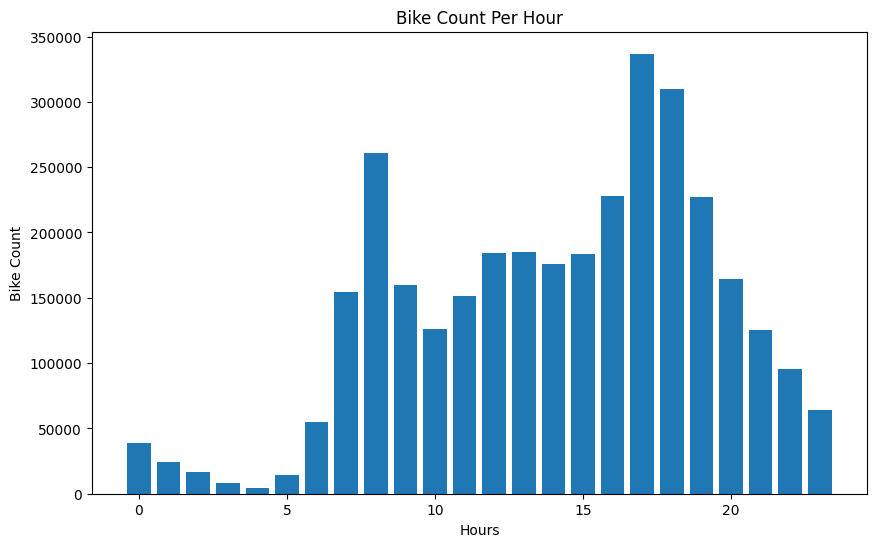

In [591]:
plt.figure(figsize=(10, 6))
plt.bar(hourly_count.index.to_list(), hourly_count.to_list())
plt.title("Bike Count Per Hour")
plt.xlabel("Hours")
plt.ylabel("Bike Count")
plt.show()


#### Visualize the distribution of count, casual and registered variables

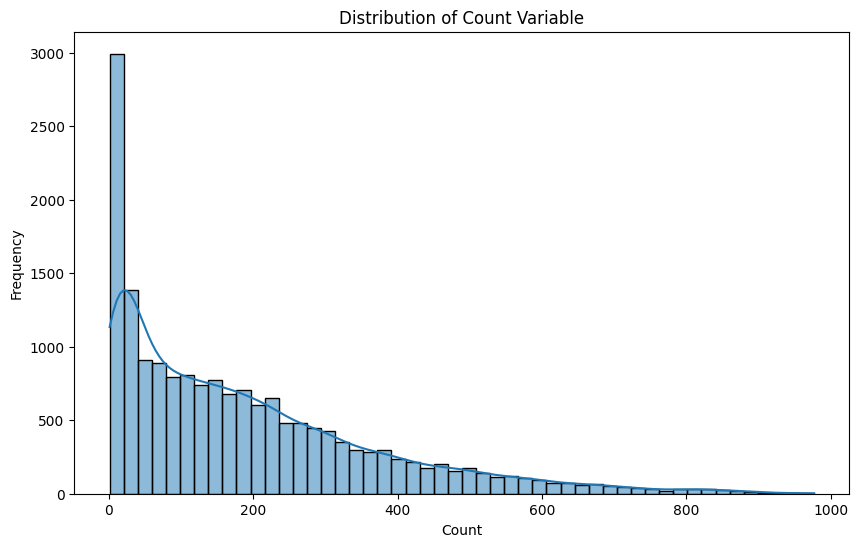

In [592]:
plt.figure(figsize=(10, 6))
sns.histplot(df["cnt"], bins=50, kde=True)
plt.title("Distribution of Count Variable")
plt.xlabel("Count")
plt.ylabel("Frequency")
plt.show()


In [593]:
# YOUR CODE HERE for distribuiton of count variable


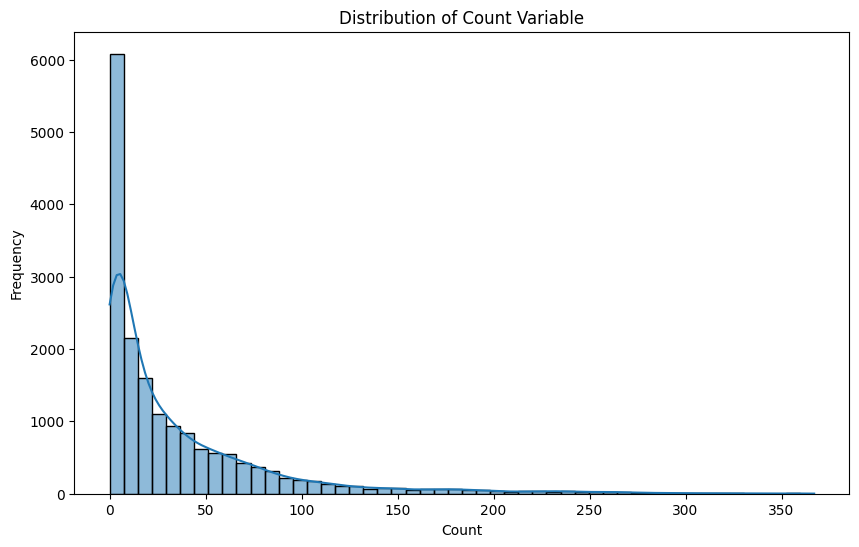

In [594]:
# YOUR CODE HERE for distribuiton of casual variable
plt.figure(figsize=(10, 6))
sns.histplot(df["casual"], bins=50, kde=True)
plt.title("Distribution of Count Variable")
plt.xlabel("Count")
plt.ylabel("Frequency")
plt.show()


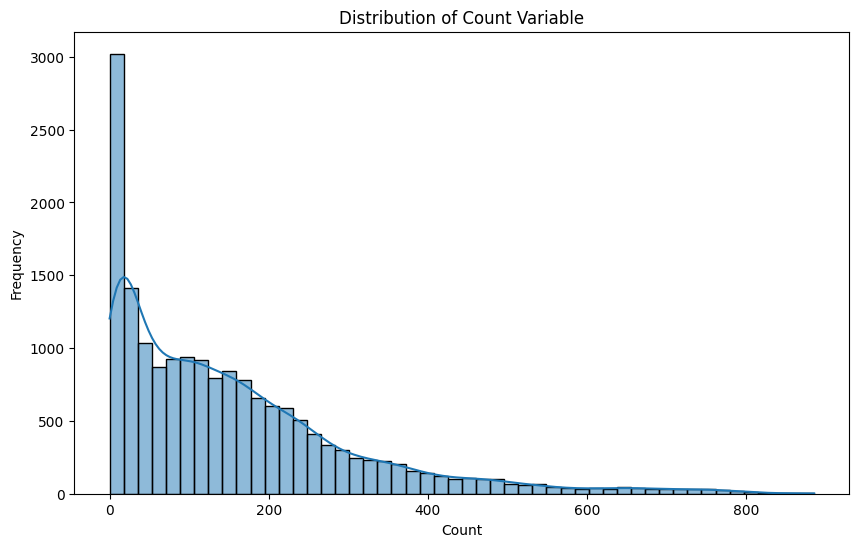

In [595]:
# YOUR CODE HERE for distribuiton of registered variable
plt.figure(figsize=(10, 6))
sns.histplot(df["registered"], bins=50, kde=True)
plt.title("Distribution of Count Variable")
plt.xlabel("Count")
plt.ylabel("Frequency")
plt.show()


In [596]:
# sns.histplot?


array([[<Axes: title={'center': 'casual'}>,
        <Axes: title={'center': 'registered'}>],
       [<Axes: title={'center': 'cnt'}>, <Axes: >]], dtype=object)

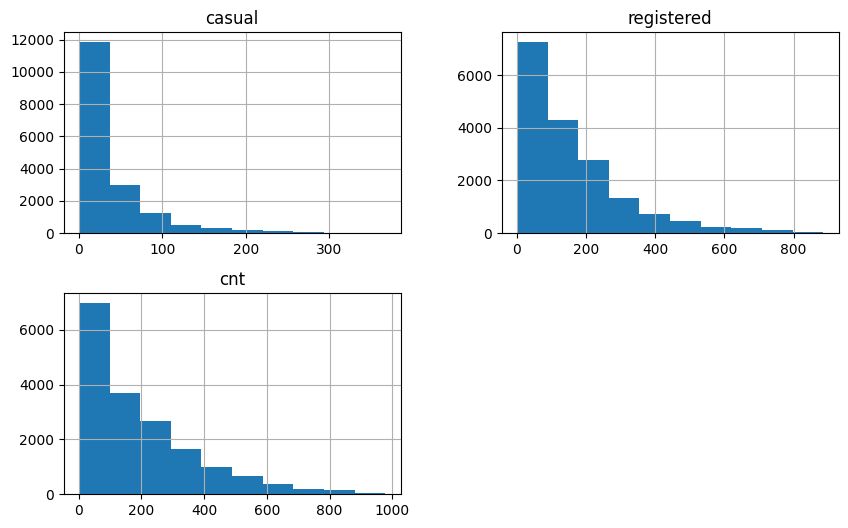

In [597]:
%matplotlib inline
df.hist(column=["casual", "registered", "cnt"], bins=10, figsize=(10, 6))


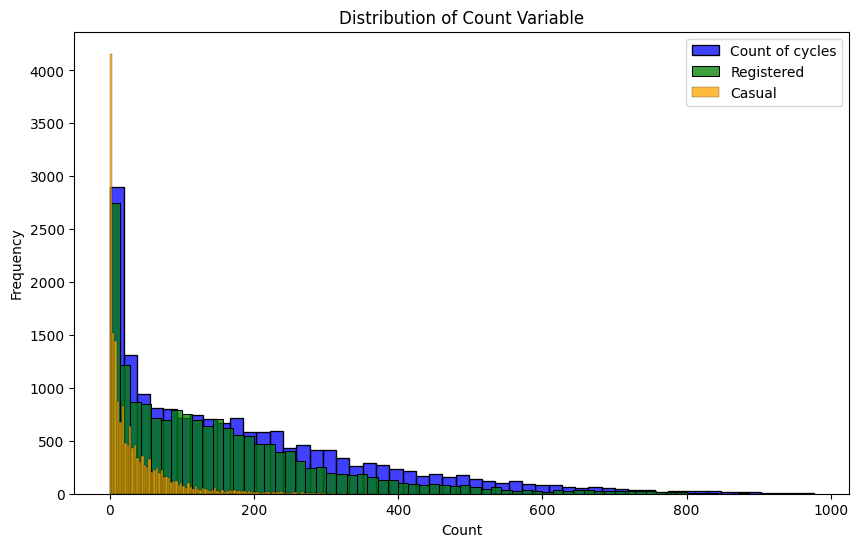

In [598]:
plt.figure(figsize=(10, 6))
sns.histplot(
    df["cnt"],
    color="blue",
    # bins="auto",
    # kde=False,
    label="Count of cycles",
)
sns.histplot(
    df["registered"],
    color="green",
    # bins="auto",
    # kde=False,
    label="Registered",
)
sns.histplot(
    df["casual"],
    color="orange",
    # bins=10,
    # kde=False,
    label="Casual",
)
plt.title("Distribution of Count Variable")
plt.xlabel("Count")
plt.ylabel("Frequency")
plt.legend()
plt.show()


#### Describe the relation of weekday, holiday and working day

In [599]:
# Weekday, holiday and working day are categorical variables
# We can perform chi square test to check if they are independent or not
# YOUR CODE HERE


# df_ = df[["weekday", "holiday", "workingday"]]
# df_ = df_.apply(pd.to_numeric, errors="coerce")
# plt.figure(figsize=(10, 6))
# sns.heatmap(df_.corr(), annot=True, linewidth=0.5, center=0)
# plt.show()
print(df["weekday"].unique())
print(df["holiday"].unique())
print(df["workingday"].unique())


[6 0 1 2 3 4 5]
[0 1]
[0 1]


#### Visualize the month wise count of both casual and registered for the year 2011 and 2012 separately.

Hint: Stacked barchart

In [600]:
# let's look at the relevant column and data
print(df.columns)
print(df["yr"].unique())
print(df["mnth"].unique())


Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')
[0 1]
[ 1  2  3  4  5  6  7  8  9 10 11 12]


In [601]:
# stacked bar chart for year 2011
# YOUR CODE HERE
df_2011 = df[df["yr"] == 0]
df_2011_ = df_2011.groupby(["mnth"])[["casual", "registered"]].sum().reset_index()
df_2011_


mnth  casual  registered
0      1    3073       35116
1      2    6242       41973
2      3   12826       51219
3      4   22346       72524
4      5   31050      104771
5      6   30612      112900
6      7   36452      104889
7      8   28842      107849
8      9   26545      100873
9     10   25222       98289
10    11   15594       86573
11    12    8448       78875

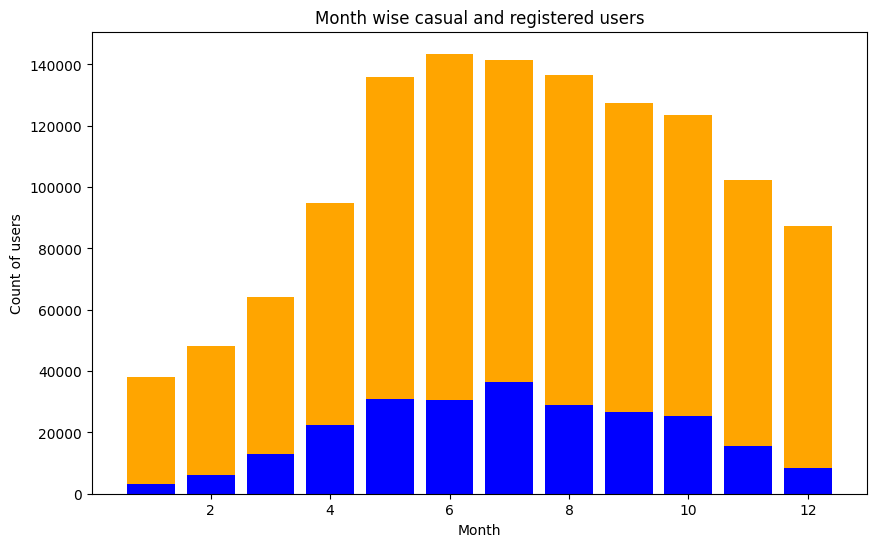

In [602]:
plt.figure(figsize=(10, 6))
plt.bar(
    df_2011_["mnth"].values, df_2011_["casual"].values, color="blue", label="casual"
)
plt.bar(
    df_2011_["mnth"].values,
    df_2011_["registered"].values,
    bottom=df_2011_["casual"].values,
    color="orange",
    label="registered",
)

plt.xlabel("Month")
plt.ylabel("Count of users")
plt.title("Month wise casual and registered users")
plt.show()


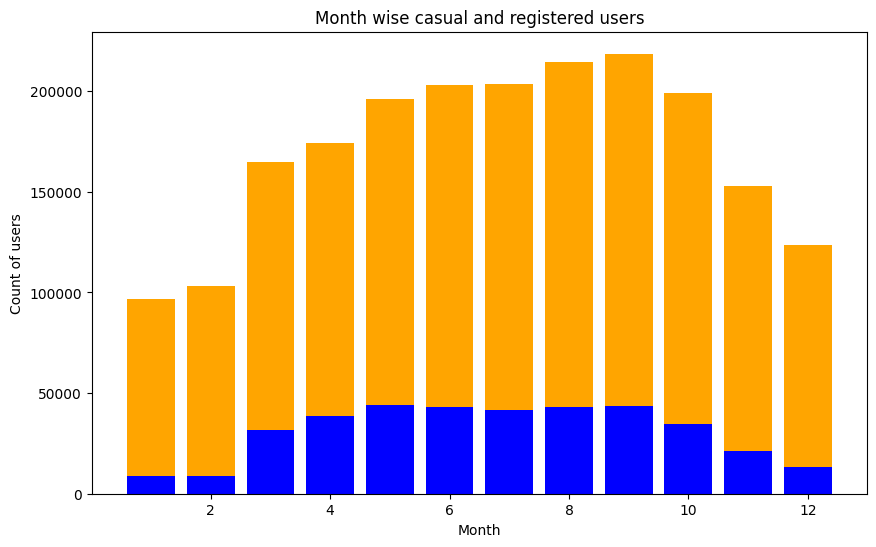

In [603]:
# stacked bar chart for year 2012
# YOUR CODE HERE
df_ = df[df["yr"] == 1]
df_ = df_.groupby(["mnth"])[["casual", "registered"]].sum().reset_index()

plt.figure(figsize=(10, 6))
plt.bar(df_["mnth"].values, df_["casual"].values, color="blue", label="casual")
plt.bar(
    df_["mnth"].values,
    df_["registered"].values,
    bottom=df_["casual"].values,
    color="orange",
    label="registered",
)

plt.xlabel("Month")
plt.ylabel("Count of users")
plt.title("Month wise casual and registered users")
plt.show()


#### Analyze the correlation between features with heatmap

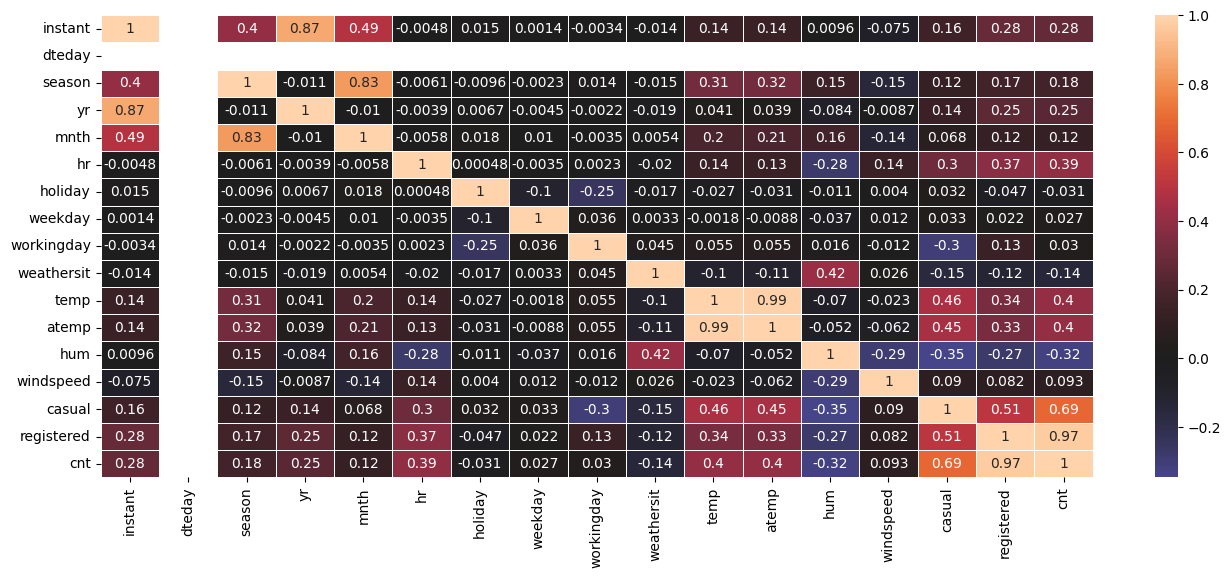

In [604]:
# YOUR CODE HERE
# Heatmap
df_ = df.copy(deep=True)
df_ = df_.apply(pd.to_numeric, errors="coerce")
plt.figure(figsize=(16, 6))
sns.heatmap(df_.corr(), annot=True, linewidth=0.5, center=0)
plt.show()


#### Understanding from the above correlation matrix

1. column `temp` and `atemp` are highly correlated (value `0.99`). Hence one can be dropped.
1. column `dteday` doesn't impact the `cnt`.
1. column `registered` users has more impact on `cnt` compared to `casual` users
1. column `instant` is indexing field hence doesn't influence the model. This comes from both domain knowledge as well as from matrix.
1. `windspeed` doesn't impact the `cnt` with coorelation value `0.093`
1. `hum` is negatively correlated with `cnt` with value `-0.32` which mean usages of cycle drops with high humidity.


#### Visualize the box plot of casual and registered variables to check the outliers

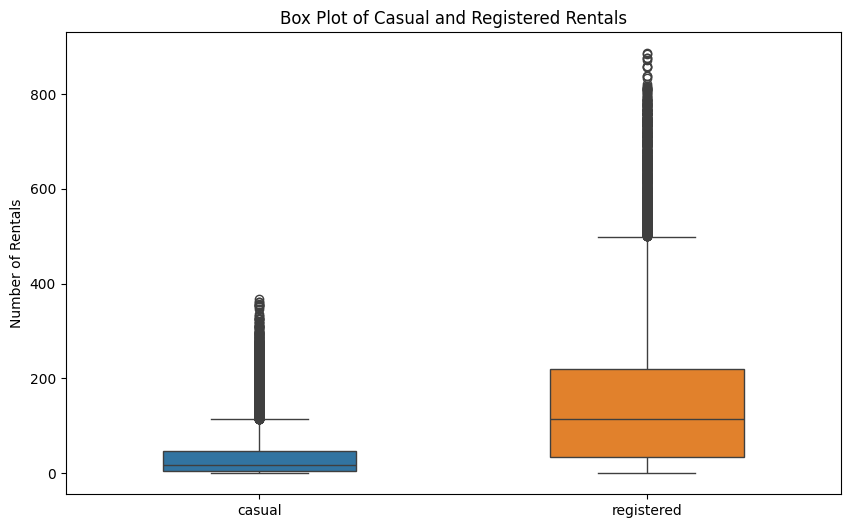

In [605]:
# YOUR CODE HERE
plt.figure(figsize=(10, 6))
sns.boxplot(data=[df["casual"], df["registered"]], width=0.5)
plt.title("Box Plot of Casual and Registered Rentals")
plt.ylabel("Number of Rentals")

plt.show()

# investigate further for the outliers
# may be a holiday.


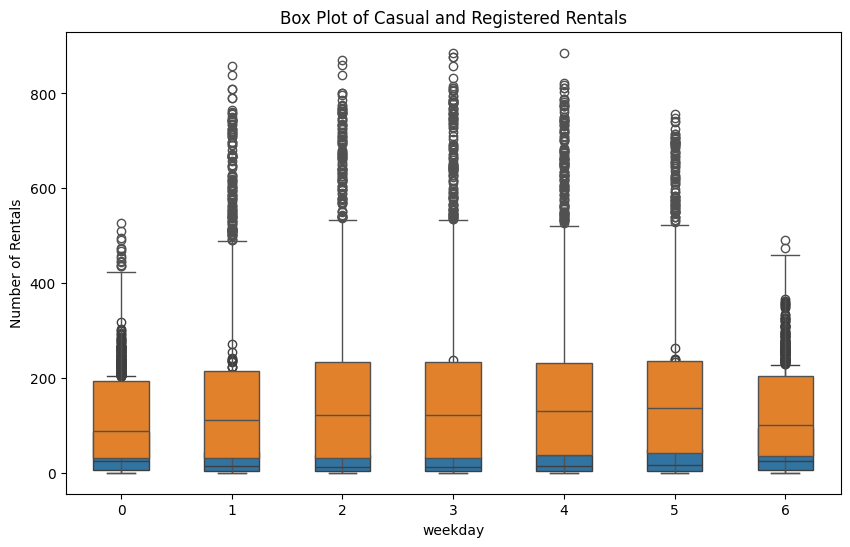

In [606]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="weekday", y="casual", data=df, width=0.5)
sns.boxplot(x="weekday", y="registered", data=df, width=0.5)
plt.title("Box Plot of Casual and Registered Rentals")
plt.ylabel("Number of Rentals")

plt.show()


In [607]:
df.describe()


instant        season            yr          mnth            hr  \
count  17379.0000  17379.000000  17379.000000  17379.000000  17379.000000   
mean    8690.0000      2.501640      0.502561      6.537775     11.546752   
std     5017.0295      1.106918      0.500008      3.438776      6.914405   
min        1.0000      1.000000      0.000000      1.000000      0.000000   
25%     4345.5000      2.000000      0.000000      4.000000      6.000000   
50%     8690.0000      3.000000      1.000000      7.000000     12.000000   
75%    13034.5000      3.000000      1.000000     10.000000     18.000000   
max    17379.0000      4.000000      1.000000     12.000000     23.000000   

            holiday       weekday    workingday    weathersit          temp  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       0.028770      3.003683      0.682721      1.425283      0.496987   
std        0.167165      2.005771      0.465431      0.639357      0.192556   
min        0.000000      0.000000      0.000000      1.000000      0.020000   
25%        0.000000      1.000000      0.000000      1.000000      0.340000   
50%        0.000000      3.000000      1.000000      1.000000      0.500000   
75%        0.000000      5.000000      1.000000      2.000000      0.660000   
max        1.000000      6.000000      1.000000      4.000000      1.000000   

              atemp           hum     windspeed        casual    registered  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       0.475775      0.627229      0.190098     35.676218    153.786869   
std        0.171850      0.192930      0.122340     49.305030    151.357286   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.333300      0.480000      0.104500      4.000000     34.000000   
50%        0.484800      0.630000      0.194000     17.000000    115.000000   
75%        0.621200      0.780000      0.253700     48.000000    220.000000   
max        1.000000      1.000000      0.850700    367.000000    886.000000   

                cnt  
count  17379.000000  
mean     189.463088  
std      181.387599  
min        1.000000  
25%       40.000000  
50%      142.000000  
75%      281.000000  
max      977.000000

### Pre-processing and Data Engineering (1 point)

#### Drop unwanted columns

In [608]:
df.head()


instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32  
3           1  0.24  0.2879  0.75        0.0       3          10   13  
4           1  0.24  0.2879  0.75        0.0       0           1    1

In [609]:
# YOUR CODE HERE
# Drop unwanted columns
df.drop(columns=["instant", "dteday", "temp"], inplace=True)
df.head(5)


season  yr  mnth  hr  holiday  weekday  workingday  weathersit   atemp  \
0       1   0     1   0        0        6           0           1  0.2879   
1       1   0     1   1        0        6           0           1  0.2727   
2       1   0     1   2        0        6           0           1  0.2727   
3       1   0     1   3        0        6           0           1  0.2879   
4       1   0     1   4        0        6           0           1  0.2879   

    hum  windspeed  casual  registered  cnt  
0  0.81        0.0       3          13   16  
1  0.80        0.0       8          32   40  
2  0.80        0.0       5          27   32  
3  0.75        0.0       3          10   13  
4  0.75        0.0       0           1    1

#### Identify categorical and continuous variables


In [610]:
# YOUR CODE HERE
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      17379 non-null  int64  
 1   yr          17379 non-null  int64  
 2   mnth        17379 non-null  int64  
 3   hr          17379 non-null  int64  
 4   holiday     17379 non-null  int64  
 5   weekday     17379 non-null  int64  
 6   workingday  17379 non-null  int64  
 7   weathersit  17379 non-null  int64  
 8   atemp       17379 non-null  float64
 9   hum         17379 non-null  float64
 10  windspeed   17379 non-null  float64
 11  casual      17379 non-null  int64  
 12  registered  17379 non-null  int64  
 13  cnt         17379 non-null  int64  
dtypes: float64(3), int64(11)
memory usage: 1.9 MB


In [611]:
#Converting Casual, Registered and Count as Float to group as continuous variable
df['casual'] = df['casual'].astype(float) 
df['registered'] = df['registered'].astype(float)
df['cnt'] = df['cnt'].astype(float)

continuous_variables = ['atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']
categorical_variables =['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit']
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      17379 non-null  int64  
 1   yr          17379 non-null  int64  
 2   mnth        17379 non-null  int64  
 3   hr          17379 non-null  int64  
 4   holiday     17379 non-null  int64  
 5   weekday     17379 non-null  int64  
 6   workingday  17379 non-null  int64  
 7   weathersit  17379 non-null  int64  
 8   atemp       17379 non-null  float64
 9   hum         17379 non-null  float64
 10  windspeed   17379 non-null  float64
 11  casual      17379 non-null  float64
 12  registered  17379 non-null  float64
 13  cnt         17379 non-null  float64
dtypes: float64(6), int64(8)
memory usage: 1.9 MB


#### Feature scaling

Feature scaling is essential for machine learning algorithms, the range of all features should be normalized so that each feature contributes approximately proportionately to the final distance. Apply scaling on the continuous variables on the given data.

Hint: `MinMaxScaler` or `StandardScaler`



In [612]:
# YOUR CODE HERE
scaler = StandardScaler()
df[continuous_variables] = scaler.fit_transform(df[continuous_variables])
df.head(10)


season  yr  mnth  hr  holiday  weekday  workingday  weathersit     atemp  \
0       1   0     1   0        0        6           0           1 -1.093281   
1       1   0     1   1        0        6           0           1 -1.181732   
2       1   0     1   2        0        6           0           1 -1.181732   
3       1   0     1   3        0        6           0           1 -1.093281   
4       1   0     1   4        0        6           0           1 -1.093281   
5       1   0     1   5        0        6           0           2 -1.269602   
6       1   0     1   6        0        6           0           1 -1.181732   
7       1   0     1   7        0        6           0           1 -1.269602   
8       1   0     1   8        0        6           0           1 -1.093281   
9       1   0     1   9        0        6           0           1 -0.740638   

        hum  windspeed    casual  registered       cnt  
0  0.947372  -1.553889 -0.662755   -0.930189 -0.956339  
1  0.895539  -1.553889 -0.561343   -0.804655 -0.824022  
2  0.895539  -1.553889 -0.622190   -0.837690 -0.868128  
3  0.636370  -1.553889 -0.662755   -0.950010 -0.972879  
4  0.636370  -1.553889 -0.723603   -1.009474 -1.039037  
5  0.636370  -0.821484 -0.723603   -1.009474 -1.039037  
6  0.895539  -1.553889 -0.683038   -1.016081 -1.033524  
7  1.206542  -1.553889 -0.703320   -1.002867 -1.028011  
8  0.636370  -1.553889 -0.703320   -0.969832 -1.000445  
9  0.688203  -1.553889 -0.561343   -0.976439 -0.967366

#### Apply one-hot encode on the categorical data

One-hot encoding is applied on the categorical variables, which should not have a different weight or order attached to them, it is presumed that all categorical variables have equivalent "values". This means that you cannot simply order them from zero to the number of categories as this would imply that the earlier categories have less "value" than later categories.

Hint: `sklearn.preprocessing.OneHotEncoder`

In [613]:
df_backup = df.copy(deep=True)


In [614]:
# YOUR CODE HERE
encoder = OneHotEncoder(sparse_output=False)
encoded_features = encoder.fit_transform(df[categorical_variables])

df_with_encoded_features = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(categorical_variables))
df_with_encoded_features.head(5)



season_1  season_2  season_3  season_4  yr_0  yr_1  mnth_1  mnth_2  mnth_3  \
0       1.0       0.0       0.0       0.0   1.0   0.0     1.0     0.0     0.0   
1       1.0       0.0       0.0       0.0   1.0   0.0     1.0     0.0     0.0   
2       1.0       0.0       0.0       0.0   1.0   0.0     1.0     0.0     0.0   
3       1.0       0.0       0.0       0.0   1.0   0.0     1.0     0.0     0.0   
4       1.0       0.0       0.0       0.0   1.0   0.0     1.0     0.0     0.0   

   mnth_4  ...  weekday_3  weekday_4  weekday_5  weekday_6  workingday_0  \
0     0.0  ...        0.0        0.0        0.0        1.0           1.0   
1     0.0  ...        0.0        0.0        0.0        1.0           1.0   
2     0.0  ...        0.0        0.0        0.0        1.0           1.0   
3     0.0  ...        0.0        0.0        0.0        1.0           1.0   
4     0.0  ...        0.0        0.0        0.0        1.0           1.0   

   workingday_1  weathersit_1  weathersit_2  weathersit_3  weathersit_4  
0           0.0           1.0           0.0           0.0           0.0  
1           0.0           1.0           0.0           0.0           0.0  
2           0.0           1.0           0.0           0.0           0.0  
3           0.0           1.0           0.0           0.0           0.0  
4           0.0           1.0           0.0           0.0           0.0  

[5 rows x 57 columns]

In [615]:
df_standardized_encoded = pd.concat([df_with_encoded_features, df[continuous_variables]], axis=1)
df_standardized_encoded.head(5)


season_1  season_2  season_3  season_4  yr_0  yr_1  mnth_1  mnth_2  mnth_3  \
0       1.0       0.0       0.0       0.0   1.0   0.0     1.0     0.0     0.0   
1       1.0       0.0       0.0       0.0   1.0   0.0     1.0     0.0     0.0   
2       1.0       0.0       0.0       0.0   1.0   0.0     1.0     0.0     0.0   
3       1.0       0.0       0.0       0.0   1.0   0.0     1.0     0.0     0.0   
4       1.0       0.0       0.0       0.0   1.0   0.0     1.0     0.0     0.0   

   mnth_4  ...  weathersit_1  weathersit_2  weathersit_3  weathersit_4  \
0     0.0  ...           1.0           0.0           0.0           0.0   
1     0.0  ...           1.0           0.0           0.0           0.0   
2     0.0  ...           1.0           0.0           0.0           0.0   
3     0.0  ...           1.0           0.0           0.0           0.0   
4     0.0  ...           1.0           0.0           0.0           0.0   

      atemp       hum  windspeed    casual  registered       cnt  
0 -1.093281  0.947372  -1.553889 -0.662755   -0.930189 -0.956339  
1 -1.181732  0.895539  -1.553889 -0.561343   -0.804655 -0.824022  
2 -1.181732  0.895539  -1.553889 -0.622190   -0.837690 -0.868128  
3 -1.093281  0.636370  -1.553889 -0.662755   -0.950010 -0.972879  
4 -1.093281  0.636370  -1.553889 -0.723603   -1.009474 -1.039037  

[5 rows x 63 columns]

#### Specify features and targets after applying scaling and one-hot encoding

In [616]:
# YOUR CODE HERE
targets = ['casual', 'registered', 'cnt']
features = df_standardized_encoded.drop(columns=targets).columns.to_list()
print(f"Features: {features}")
print(f"Targets: {targets}")


Features: ['season_1', 'season_2', 'season_3', 'season_4', 'yr_0', 'yr_1', 'mnth_1', 'mnth_2', 'mnth_3', 'mnth_4', 'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9', 'mnth_10', 'mnth_11', 'mnth_12', 'hr_0', 'hr_1', 'hr_2', 'hr_3', 'hr_4', 'hr_5', 'hr_6', 'hr_7', 'hr_8', 'hr_9', 'hr_10', 'hr_11', 'hr_12', 'hr_13', 'hr_14', 'hr_15', 'hr_16', 'hr_17', 'hr_18', 'hr_19', 'hr_20', 'hr_21', 'hr_22', 'hr_23', 'holiday_0', 'holiday_1', 'weekday_0', 'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5', 'weekday_6', 'workingday_0', 'workingday_1', 'weathersit_1', 'weathersit_2', 'weathersit_3', 'weathersit_4', 'atemp', 'hum', 'windspeed']
Targets: ['casual', 'registered', 'cnt']


### Implement the linear regression by finding the coefficients using below approaches (2 points)

* Find the coefficients using normal equation

* (Optional) Implement batch gradient descent

* (Optional) SGD Regressor from sklearn

#### Select the features and target and split the dataset

As there are 3 target variables, choose the count (`cnt`) variable.

In [617]:
# YOUR CODE HERE
y = df_standardized_encoded['cnt']
X = df_standardized_encoded[features]


In [618]:
y.head(5)


0   -0.956339
1   -0.824022
2   -0.868128
3   -0.972879
4   -1.039037
Name: cnt, dtype: float64

In [619]:
X.head(5)


season_1  season_2  season_3  season_4  yr_0  yr_1  mnth_1  mnth_2  mnth_3  \
0       1.0       0.0       0.0       0.0   1.0   0.0     1.0     0.0     0.0   
1       1.0       0.0       0.0       0.0   1.0   0.0     1.0     0.0     0.0   
2       1.0       0.0       0.0       0.0   1.0   0.0     1.0     0.0     0.0   
3       1.0       0.0       0.0       0.0   1.0   0.0     1.0     0.0     0.0   
4       1.0       0.0       0.0       0.0   1.0   0.0     1.0     0.0     0.0   

   mnth_4  ...  weekday_6  workingday_0  workingday_1  weathersit_1  \
0     0.0  ...        1.0           1.0           0.0           1.0   
1     0.0  ...        1.0           1.0           0.0           1.0   
2     0.0  ...        1.0           1.0           0.0           1.0   
3     0.0  ...        1.0           1.0           0.0           1.0   
4     0.0  ...        1.0           1.0           0.0           1.0   

   weathersit_2  weathersit_3  weathersit_4     atemp       hum  windspeed  
0           0.0           0.0           0.0 -1.093281  0.947372  -1.553889  
1           0.0           0.0           0.0 -1.181732  0.895539  -1.553889  
2           0.0           0.0           0.0 -1.181732  0.895539  -1.553889  
3           0.0           0.0           0.0 -1.093281  0.636370  -1.553889  
4           0.0           0.0           0.0 -1.093281  0.636370  -1.553889  

[5 rows x 60 columns]

In [620]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((13903, 60), (3476, 60), (13903,), (3476,))

#### Implementation using Normal Equation

$\theta = (X^T X)^{-1} . (X^T Y)$

$θ$ is the hypothesis parameter that defines the coefficients

$X$ is the input feature value of each instance

$Y$ is Output value of each instance

For performing Linear Regression Using the Normal Equation refer [here](https://cdn.iisc.talentsprint.com/CDS/Assignments/Module2/M2_SNB_MiniProject_1_LinearRegression_Regularization_Performing%20Linear%20Regression%20using%20Normal%20equation.pdf).

To solve the normal equation compute least-squares solution by using `scipy.linalg`

Hint: [scipy.linalg.lstsq](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.lstsq.html)

In [621]:
# YOUR CODE HERE
X_train_with_intercept = add_dummy_feature(X_train, 1)
model_parameters_theta = np.linalg.inv(X_train_with_intercept.T @ X_train_with_intercept) @ X_train_with_intercept.T @ y_train
model_parameters_theta


array([ 3.50052049e+15,  5.44045683e+15,  5.44045683e+15,  5.44045683e+15,
        5.44045683e+15, -3.57915290e+15, -3.57915290e+15,  1.47252981e+15,
        1.47252981e+15,  1.47252981e+15,  1.47252981e+15,  1.47252981e+15,
        1.47252981e+15,  1.47252981e+15,  1.47252981e+15,  1.47252981e+15,
        1.47252981e+15,  1.47252981e+15,  1.47252981e+15, -7.37054569e+15,
       -7.37054569e+15, -7.37054569e+15, -7.37054569e+15, -7.37054569e+15,
       -7.37054569e+15, -7.37054569e+15, -7.37054569e+15, -7.37054569e+15,
       -7.37054569e+15, -7.37054569e+15, -7.37054569e+15, -7.37054569e+15,
       -7.37054569e+15, -7.37054569e+15, -7.37054569e+15, -7.37054569e+15,
       -7.37054569e+15, -7.37054569e+15, -7.37054569e+15, -7.37054569e+15,
       -7.37054569e+15, -7.37054569e+15, -7.37054569e+15,  2.63914793e+14,
        1.90949504e+15,  2.01170805e+15,  3.66127800e+14,  3.66127800e+14,
        3.66127800e+14,  3.66127800e+14,  3.66127800e+14,  2.01170805e+15,
       -1.73943138e+15, -

In [622]:
X_test_with_intercept = add_dummy_feature(X_test, 1)
y_pred = X_test_with_intercept @ model_parameters_theta
y_pred


array([ 40.    ,  34.6875,  30.    , ..., -15.5   ,  80.    ,  22.5   ],
      shape=(3476,))

In [623]:
#MeanSquared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error: ", mse)
print("RMSE: ", np.sqrt(mse))
print("R2 score: ", r2_score(y_test, y_pred))


Mean Squared Error:  1072.4561548850509
RMSE:  32.748376370211865
R2 score:  -1113.2550382696643


In [624]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_train_with_intercept, y_train, rcond=1e-6)
y_pred_using_scipy = X_test_with_intercept @ theta_best_svd
y_pred_using_scipy


array([ 1.40194737, -0.15317586, -1.01443097, ..., -0.56906024,
        0.05521864,  0.37064667], shape=(3476,))

In [625]:
mse_using_scipy = mean_squared_error(y_test, y_pred_using_scipy)
print("Mean Squared Error: ", mse_using_scipy)
print("RMSE: ", np.sqrt(mse_using_scipy))
print("R2 score: ", r2_score(y_test, y_pred_using_scipy))


Mean Squared Error:  0.3070163876917084
RMSE:  0.5540905952023626
R2 score:  0.6810176758661939


#### (Optional) Implementing Linear regression using batch gradient descent

Initialize the random coefficients and optimize the coefficients in the iterative process by calculating cost and finding the gradient.

Hint: [gradient descent](https://cdn.iisc.talentsprint.com/CDS/Assignments/Module2/M2_SNB_MiniProject_1_LinearRegression_Regularization_Multivariate%20Linear%20Regression.pdf)

In [626]:
# YOUR CODE HERE
errs_1_eta1 = []
eta = 0.1           # learning rate
np.random.seed(42)
theta_parameters = np.random.randn(X_train.shape[1])
for iteration in range(3000):
    const = - 2.0/len(y_train)
    y_pred_gd = X_train @ theta_parameters
    error = y_train - y_pred_gd
    gradient = const * (X_train.T @ error)
    theta_parameters = theta_parameters - eta * gradient
    error = mean_squared_error(y_train, y_pred_gd)
    errs_1_eta1.append(error)
    if iteration%500 == 0:
        print('Iteration : ', iteration)
        print("MSE: ", error)
theta_parameters_final = theta_parameters


Iteration :  0
MSE:  6.3048714257810925
Iteration :  500
MSE:  0.3266479827713976
Iteration :  1000
MSE:  0.3179522286882191
Iteration :  1500
MSE:  0.3165187458459953
Iteration :  2000
MSE:  0.3162372479400457
Iteration :  2500
MSE:  0.31617530399375066


In [627]:
errs_1_eta1[-1]


0.3161577256136616

In [628]:
errs_1_eta2 = []
eta = 0.01           # learning rate
np.random.seed(42)
theta_parameters = np.random.randn(X_train.shape[1])
for iteration in range(3000):
    const = - 2.0/len(y_train)
    y_pred_gd = X_train @ theta_parameters
    error = y_train - y_pred_gd
    gradient = const * (X_train.T @ error)
    theta_parameters = theta_parameters - eta * gradient
    error = mean_squared_error(y_train, y_pred_gd)
    errs_1_eta2.append(error)
    if iteration%500 == 0:
        print('Iteration : ', iteration)
        print("MSE: ", error)
theta_parameters_final2 = theta_parameters


Iteration :  0
MSE:  6.3048714257810925
Iteration :  500
MSE:  1.1266443964959618
Iteration :  1000
MSE:  0.6474609180374552
Iteration :  1500
MSE:  0.4735261765386208
Iteration :  2000
MSE:  0.39930553189921003
Iteration :  2500
MSE:  0.3648928725961171


In [629]:
errs_1_eta2[-1]


0.34773887569074013

In [630]:
errs_1_eta3 = []
eta = 0.0001           # learning rate
np.random.seed(42)
theta_parameters = np.random.randn(X_train.shape[1])
for iteration in range(3000):
    const = - 2.0/len(y_train)
    y_pred_gd = X_train @ theta_parameters
    error = y_train - y_pred_gd
    gradient = const * (X_train.T @ error)
    theta_parameters = theta_parameters - eta * gradient
    error = mean_squared_error(y_train, y_pred_gd)
    errs_1_eta3.append(error)
    if iteration%500 == 0:
        print('Iteration : ', iteration)
        print("MSE: ", error)
theta_parameters_final3 = theta_parameters


Iteration :  0
MSE:  6.3048714257810925
Iteration :  500
MSE:  5.531929725346794
Iteration :  1000
MSE:  4.95340833985375
Iteration :  1500
MSE:  4.509768338325415
Iteration :  2000
MSE:  4.162516985816204
Iteration :  2500
MSE:  3.885912442186992


In [631]:
#Prediction of X_test
y_pred_test = X_test @ theta_parameters_final
mse_gd = mean_squared_error(y_test, y_pred_test)
metric_df_sd = pd.DataFrame({'MSE': [mse_gd], 'RMSE': [np.sqrt(mse_gd)], "R2 score": [r2_score(y_test, y_pred_test)]})
metric_df_sd


MSE      RMSE  R2 score
0  0.307899  0.554886  0.680101

#### (Optional) SGD Regressor

Scikit-learn API provides the SGDRegressor class to implement SGD method for regression problems. The SGD regressor applies regularized linear model with SGD learning to build an estimator. A regularizer is a penalty (L1, L2, or Elastic Net) added to the loss function to shrink the model parameters.

* Import SGDRegressor from sklearn and fit the data

* Predict the test data and find the error

Hint: [SGDRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html)

In [632]:
# YOUR CODE HERE


### Linear regression using sklearn (3 points)

Implement the linear regression model using sklearn

* Import Linear Regression and fit the train data

* Predict the test data and find the error

Hint: [LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

In [633]:
# YOUR CODE HERE

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
coefficients = lin_reg.coef_
y_pred_using_model = lin_reg.predict(X_test)
metrics_dict = {}
mse2 = mean_squared_error(y_test, y_pred_using_model)
r2 = r2_score(y_test, y_pred_using_model)
metrics_dict['MSE'] = [mse2]
rmse = np.sqrt(mse2)
metrics_dict['RMSE'] = [rmse]
metrics_dict['R2 Score'] = [r2]
metrics_df_lin_reg = pd.DataFrame(metrics_dict)
metrics_df_lin_reg


MSE      RMSE  R2 Score
0  0.307016  0.554091  0.681018

#### Calculate the $R^2$ (coefficient of determination) of the actual and predicted data

In [634]:
# YOUR CODE HERE
r2 = r2_score(y_test, y_pred_using_model)
print("R2 score: ", r2)


R2 score:  0.6810176758661936


In [635]:
print("Linear Regression Bias: ", lin_reg.intercept_)
print("Linear Regression Coefficents/Weights : ", coefficients)
print("Predicted Value : ", y_pred_using_model)


Linear Regression Bias:  -0.29044069331670785
Linear Regression Coefficents/Weights :  [-0.18375543  0.00145577 -0.0122577   0.19455736 -0.23790061  0.23790061
 -0.06395931 -0.05046838  0.0269938   0.01060973  0.09661407  0.0399692
 -0.07299154  0.03143065  0.16750868  0.04075889 -0.12290581 -0.10355999
 -0.69318285 -0.78649183 -0.84406172 -0.89991239 -0.91372889 -0.81471451
 -0.50220993  0.25279997  1.04851915  0.2115542  -0.07737018  0.04823972
  0.28439404  0.26108354  0.14359106  0.19437923  0.55869231  1.42413915
  1.20026249  0.61065663  0.18939161 -0.08937007 -0.29574102 -0.51091972
  0.04921168 -0.04921168 -0.03125237 -0.0264625  -0.01551231 -0.00295199
 -0.00693344  0.02345127  0.05966134 -0.02080271  0.02080271  0.2796729
  0.21935465 -0.07433887 -0.42468868  0.22160627 -0.08836435 -0.01657373]
Predicted Value :  [ 1.40194737 -0.15317586 -1.01443097 ... -0.56906024  0.05521864
  0.37064667]


In [636]:
act_pred_df = pd.DataFrame({'Actuals': y_test, 'Predicted': y_pred_using_model})
act_pred_df


Actuals  Predicted
12830  1.298566   1.401947
8688  -0.559388  -0.153176
7091  -1.022498  -1.014431
12230  1.855400   1.321458
431   -0.972879  -1.442943
...         ...        ...
6759  -0.950826  -0.864354
13989 -0.575927  -0.785738
173   -0.504256  -0.569060
16192  0.421964   0.055219
8211   0.427478   0.370647

[3476 rows x 2 columns]

#### Summarize the importance of features

Prediction is the weighted sum of the input values e.g. linear regression. Regularization, such as ridge regression and the elastic net, find a set of coefficients to use in the weighted sum to make a prediction. These coefficients can be used directly as a crude type of feature importance score.
This assumes that the input variables have the same scale or have been scaled prior to fitting a model.

Use the coefficients obtained through the sklearn Linear Regression implementation and create a bar chart of the coefficients.

In [568]:
# YOUR CODE HERE
y_value = coefficients
x_value = X_test.columns


In [637]:
df_feat_cof = pd.DataFrame({'Features': x_value, 'Coefficients': y_value})
df_feat_cof


Features  Coefficients
0       season_1     -0.183755
1       season_2      0.001456
2       season_3     -0.012258
3       season_4      0.194557
4           yr_0     -0.237901
5           yr_1      0.237901
6         mnth_1     -0.063959
7         mnth_2     -0.050468
8         mnth_3      0.026994
9         mnth_4      0.010610
10        mnth_5      0.096614
11        mnth_6      0.039969
12        mnth_7     -0.072992
13        mnth_8      0.031431
14        mnth_9      0.167509
15       mnth_10      0.040759
16       mnth_11     -0.122906
17       mnth_12     -0.103560
18          hr_0     -0.693183
19          hr_1     -0.786492
20          hr_2     -0.844062
21          hr_3     -0.899912
22          hr_4     -0.913729
23          hr_5     -0.814715
24          hr_6     -0.502210
25          hr_7      0.252800
26          hr_8      1.048519
27          hr_9      0.211554
28         hr_10     -0.077370
29         hr_11      0.048240
30         hr_12      0.284394
31         hr_13      0.261084
32         hr_14      0.143591
33         hr_15      0.194379
34         hr_16      0.558692
35         hr_17      1.424139
36         hr_18      1.200262
37         hr_19      0.610657
38         hr_20      0.189392
39         hr_21     -0.089370
40         hr_22     -0.295741
41         hr_23     -0.510920
42     holiday_0      0.049212
43     holiday_1     -0.049212
44     weekday_0     -0.031252
45     weekday_1     -0.026463
46     weekday_2     -0.015512
47     weekday_3     -0.002952
48     weekday_4     -0.006933
49     weekday_5      0.023451
50     weekday_6      0.059661
51  workingday_0     -0.020803
52  workingday_1      0.020803
53  weathersit_1      0.279673
54  weathersit_2      0.219355
55  weathersit_3     -0.074339
56  weathersit_4     -0.424689
57         atemp      0.221606
58           hum     -0.088364
59     windspeed     -0.016574

/var/folders/x_/586jm8gs3s385026b8mq6gmc0000gn/T/ipykernel_40426/1221917140.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(x_value, rotation=60)


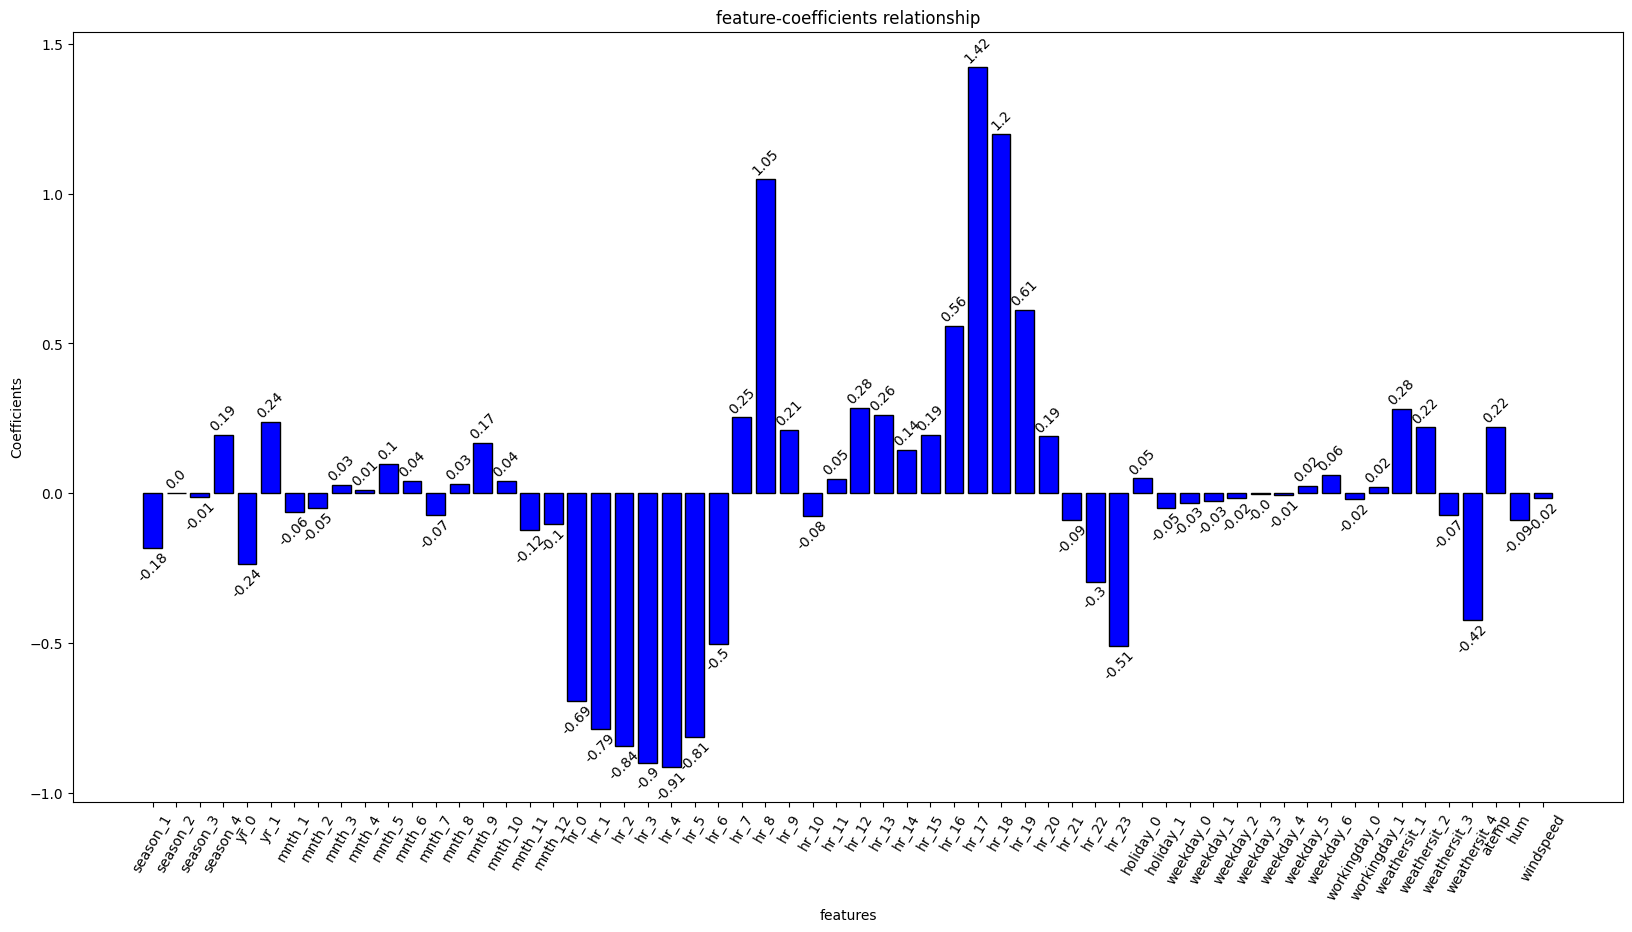

In [576]:
# YOUR CODE HERE
fig, ax = plt.subplots(figsize=(20, 10))
barplot = ax.bar(x_value, y_value, color='blue', edgecolor='black')
ax.bar_label(barplot, labels = y_value.round(2), label_type='edge', padding=1, rotation=45)
ax.set_xticklabels(x_value, rotation=60)
ax.set_xlabel("features")
ax.set_ylabel("Coefficients")
ax.set_title("feature-coefficients relationship")
plt.show()


##### Analysis

1. `temp` is important feature which has more impact on cnt
1. 17th and 18th hour are busiest time and coefficients also show that good impact on `cnt`



### Regularization methods (2 points)

#### Apply Lasso regression

* Apply Lasso regression with different alpha values given below and find the best alpha that gives the least error.
* Calculate the metrics for the actual and predicted

Hint: [Lasso](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html)

In [638]:
# setting up alpha
alpha = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]


In [639]:
# YOUR CODE HERE
# YOUR CODE HERE
alpha_error_result_dict = {}
intercept_dict, coefficient_dict, rmse_lasso_dict, r2_lasso_dict = {}, {}, {}, {}
for a in alpha:
    Lreg = linear_model.Lasso(alpha = a, random_state=42)
    Lreg.fit(X_train, y_train)
    y_pred_using_lasso = Lreg.predict(X_test)
    mse_using_lasso = mean_squared_error(y_test, y_pred_using_lasso)
    alpha_error_result_dict[a] = mse_using_lasso
    rmse_lasso_dict[a] = np.sqrt(mse_using_lasso)
    r2_lasso_dict[a] = r2_score(y_test, y_pred_using_lasso)
    intercept_dict[a] = Lreg.intercept_
    coefficient_dict[a] = Lreg.coef_


In [640]:
lasso_df = pd.DataFrame({"Alpha": alpha_error_result_dict.keys(), 'MSE':alpha_error_result_dict.values(), 'RMSE': rmse_lasso_dict.values(), 'R2 score': r2_lasso_dict.values() })
lasso_df = lasso_df.sort_values(by=['MSE'])
lasso_df


Alpha       MSE      RMSE  R2 score
0    0.0001  0.306681  0.553788  0.681366
1    0.0010  0.306985  0.554062  0.681051
2    0.0100  0.360624  0.600520  0.625321
3    0.1000  0.723713  0.850713  0.248080
4    1.0000  0.963430  0.981545 -0.000980
5   10.0000  0.963430  0.981545 -0.000980
6  100.0000  0.963430  0.981545 -0.000980

In [641]:
print(f"Alpha for least mean squared error : {lasso_df.loc[0, 'MSE']} --> ", lasso_df.loc[0, 'Alpha'])
print(f"Coefficients--> ",coefficient_dict[lasso_df.loc[0, 'Alpha']])
print(f"Intercept --> ",intercept_dict[lasso_df.loc[0, 'Alpha']])


Alpha for least mean squared error : 0.3066811258199796 -->  0.0001
Coefficients-->  [-1.89874830e-01  0.00000000e+00 -1.13695768e-02  1.87853716e-01
 -4.74899600e-01  4.42531492e-16 -6.57966498e-02 -5.25927817e-02
  1.89334734e-02 -0.00000000e+00  8.22921972e-02  2.26415579e-02
 -9.08024916e-02  1.28972493e-02  1.52761948e-01  3.37705269e-02
 -1.25616428e-01 -1.05292326e-01 -8.28385709e-01 -9.21425860e-01
 -9.78934706e-01 -1.03414365e+00 -1.04802540e+00 -9.48876411e-01
 -6.36334818e-01  1.13531745e-01  9.08733079e-01  7.09544859e-02
 -2.13898954e-01 -8.90637203e-02  1.41748152e-01  1.17906042e-01
  0.00000000e+00  5.06461449e-02  4.14195428e-01  1.28082640e+00
  1.05641543e+00  4.68500469e-01  4.76966884e-02 -2.25752614e-01
 -4.31671561e-01 -6.46534723e-01  1.37486593e-01 -5.90764255e-15
 -6.45392598e-02 -1.91039832e-02 -7.65856078e-03  3.19622048e-03
  0.00000000e+00  3.00260825e-02  2.47299446e-02 -5.71701884e-06
  0.00000000e+00  1.31874773e-01  7.21172965e-02 -2.18095116e-01
 -0.0

#### Apply Ridge regression

* Apply Ridge regression with different alpha values given and find the best alpha that gives the least error.
* Calculate the metrics for the actual and predicted

Hint: [Ridge](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html)

In [642]:
# YOUR CODE HERE
alpha_error_result_dict_using_ridge, rmse_ridge_dict, r2_ridge_dict = {}, {}, {}
intercept_dict_using_ridge, coefficient_dict_using_ridge = {}, {}
for a in alpha:
    rdg = linear_model.Ridge(alpha = a, random_state=42)
    rdg.fit(X_train, y_train)
    y_pred_using_ridge = rdg.predict(X_test)
    mse_using_ridge = mean_squared_error(y_test, y_pred_using_ridge)
    alpha_error_result_dict_using_ridge[a] = mse_using_ridge
    rmse_ridge_dict[a] =np.sqrt(mse_using_ridge)
    intercept_dict_using_ridge[a] = rdg.intercept_
    coefficient_dict_using_ridge[a] = rdg.coef_
    r2_ridge_dict[a]=r2_score(y_test, y_pred_using_ridge)


In [643]:
ridge_df = pd.DataFrame({"Alpha": alpha_error_result_dict_using_ridge.keys(), 'MSE':alpha_error_result_dict_using_ridge.values(), 'RMSE': rmse_ridge_dict.values(), 'R2 score': r2_ridge_dict.values() })
ridge_df = ridge_df.sort_values(by=['MSE'])
ridge_df


Alpha       MSE      RMSE  R2 score
5   10.0000  0.306556  0.553675  0.681496
4    1.0000  0.306887  0.553974  0.681152
3    0.1000  0.307000  0.554075  0.681035
2    0.0100  0.307015  0.554089  0.681019
1    0.0010  0.307016  0.554090  0.681018
0    0.0001  0.307016  0.554091  0.681018
6  100.0000  0.314593  0.560886  0.673146

In [645]:
ridge_df.iloc[0]['Alpha']


np.float64(10.0)

In [644]:
print(f"Alpha for least mean squared error : {ridge_df.iloc[0]['MSE']} --> ", ridge_df.iloc[0]['Alpha'])
print(f"Coefficients--> ",coefficient_dict_using_ridge[ridge_df.iloc[0]['Alpha']])
print(f"Intercept --> ",intercept_dict_using_ridge[ridge_df.iloc[0]['Alpha']])


Alpha for least mean squared error : 0.30655577117702665 -->  10.0
Coefficients-->  [-0.18295531  0.00608719 -0.01292032  0.18978844 -0.23671888  0.23671888
 -0.05415179 -0.04365994  0.02740808  0.00480065  0.0884555   0.02688931
 -0.08367401  0.02381331  0.16503323  0.04733292 -0.11139334 -0.09085392
 -0.67751937 -0.76849573 -0.82486262 -0.87739913 -0.89128817 -0.79377834
 -0.48660622  0.25444369  1.03521398  0.20968824 -0.0767483   0.04413403
  0.27433737  0.24995261  0.13321479  0.18280808  0.54081711  1.39348108
  1.17347594  0.59705324  0.1846774  -0.08762239 -0.28918035 -0.49979693
  0.04958288 -0.04958288 -0.03041868 -0.0262255  -0.01542953 -0.00307325
 -0.00749798  0.02333845  0.05930649 -0.02069507  0.02069507  0.16116436
  0.1042971  -0.18094678 -0.08451467  0.23063167 -0.09483642 -0.01528885]
Intercept -->  -0.17400934297648765


#### Apply Elasticnet regression

* Apply Elasticnet regression with different alpha values given and find the best alpha that gives the least error.
* Calculate the metrics for the actual and predicted

Hint: [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html)

In [646]:
# YOUR CODE HERE
alpha_error_result_dict_using_elastic, rmse_elastic_dict, r2_elastic_dict = {}, {}, {}
intercept_dict_using_elastic, coefficient_dict_using_elastic = {}, {}
for a in alpha:
    ENreg = linear_model.ElasticNet(alpha = a)
    ENreg.fit(X_train, y_train)
    y_pred_using_elastic = ENreg.predict(X_test)
    mse_using_elastic = mean_squared_error(y_test, y_pred_using_elastic)
    alpha_error_result_dict_using_elastic[a] = mse_using_elastic
    intercept_dict_using_elastic[a] = ENreg.intercept_
    coefficient_dict_using_elastic[a] = ENreg.coef_
    r2_elastic_dict[a] = r2_score(y_test, y_pred_using_elastic)
    rmse_elastic_dict[a] = np.sqrt(mse_using_elastic)


/Users/rajiv-ranjan/Documents/github/rajiv-ranjan/cds-mini-projects/m2/mini-project-1/.venv/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.533e+00, tolerance: 1.403e+00
  model = cd_fast.enet_coordinate_descent(


In [647]:
elastic_df = pd.DataFrame({"Alpha": alpha_error_result_dict_using_elastic.keys(), 'MSE':alpha_error_result_dict_using_elastic.values(), 'RMSE': rmse_elastic_dict.values(), 'R2 score': r2_elastic_dict.values() })
elastic_df = elastic_df.sort_values(by=['MSE'])
elastic_df


Alpha       MSE      RMSE  R2 score
1    0.0010  0.306619  0.553732  0.681430
0    0.0001  0.306752  0.553852  0.681292
2    0.0100  0.337456  0.580910  0.649391
3    0.1000  0.685177  0.827754  0.288119
4    1.0000  0.963430  0.981545 -0.000980
5   10.0000  0.963430  0.981545 -0.000980
6  100.0000  0.963430  0.981545 -0.000980

In [648]:
print(f"Alpha for least mean squared error : {elastic_df.iloc[0]['MSE']} --> ", elastic_df.iloc[0]['Alpha'])
print(f"Coefficients--> ",coefficient_dict_using_elastic[elastic_df.iloc[0]['Alpha']])
print(f"Intercept --> ",intercept_dict_using_elastic[elastic_df.iloc[0]['Alpha']])


Alpha for least mean squared error : 0.3066190820858866 -->  0.001
Coefficients-->  [-1.94466802e-01  1.57385944e-02 -4.28395751e-04  1.73457677e-01
 -2.68446551e-01  2.01606951e-01 -1.67816935e-02 -1.03465954e-02
  3.46067436e-02 -0.00000000e+00  7.01614476e-02  1.98339963e-04
 -1.05616619e-01  0.00000000e+00  1.51315665e-01  6.22831398e-02
 -7.79392044e-02 -5.49522029e-02 -7.06401827e-01 -7.96841432e-01
 -8.53392842e-01 -9.04060601e-01 -9.18269808e-01 -8.19733912e-01
 -5.10775614e-01  2.09088432e-01  9.92139707e-01  1.59599374e-01
 -1.07038142e-01 -0.00000000e+00  2.17736475e-01  1.91511314e-01
  7.25085055e-02  1.22024517e-01  4.82240510e-01  1.34037725e+00
  1.12053007e+00  5.43806403e-01  1.30873790e-01 -1.17394907e-01
 -3.18527303e-01 -5.29133973e-01  4.75013839e-02 -4.78504789e-02
 -2.55830278e-02 -1.60715855e-02 -3.97771260e-03  1.26951426e-03
 -0.00000000e+00  2.83236416e-02  5.64507761e-02 -2.07465823e-02
  1.22848437e-02  5.38927176e-02  0.00000000e+00 -2.72741292e-01
 -0.00

### Determine if there is a reduction in error if two target variables are considered

Consider (`Casual, Registered`) as target and find the error by implementing Linear Regression model from sklearn

In [650]:
df_standardized_encoded.columns


Index(['season_1', 'season_2', 'season_3', 'season_4', 'yr_0', 'yr_1',
       'mnth_1', 'mnth_2', 'mnth_3', 'mnth_4', 'mnth_5', 'mnth_6', 'mnth_7',
       'mnth_8', 'mnth_9', 'mnth_10', 'mnth_11', 'mnth_12', 'hr_0', 'hr_1',
       'hr_2', 'hr_3', 'hr_4', 'hr_5', 'hr_6', 'hr_7', 'hr_8', 'hr_9', 'hr_10',
       'hr_11', 'hr_12', 'hr_13', 'hr_14', 'hr_15', 'hr_16', 'hr_17', 'hr_18',
       'hr_19', 'hr_20', 'hr_21', 'hr_22', 'hr_23', 'holiday_0', 'holiday_1',
       'weekday_0', 'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4',
       'weekday_5', 'weekday_6', 'workingday_0', 'workingday_1',
       'weathersit_1', 'weathersit_2', 'weathersit_3', 'weathersit_4', 'atemp',
       'hum', 'windspeed', 'casual', 'registered', 'cnt'],
      dtype='object')

In [649]:
df_standardized_encoded.head(5)


season_1  season_2  season_3  season_4  yr_0  yr_1  mnth_1  mnth_2  mnth_3  \
0       1.0       0.0       0.0       0.0   1.0   0.0     1.0     0.0     0.0   
1       1.0       0.0       0.0       0.0   1.0   0.0     1.0     0.0     0.0   
2       1.0       0.0       0.0       0.0   1.0   0.0     1.0     0.0     0.0   
3       1.0       0.0       0.0       0.0   1.0   0.0     1.0     0.0     0.0   
4       1.0       0.0       0.0       0.0   1.0   0.0     1.0     0.0     0.0   

   mnth_4  ...  weathersit_1  weathersit_2  weathersit_3  weathersit_4  \
0     0.0  ...           1.0           0.0           0.0           0.0   
1     0.0  ...           1.0           0.0           0.0           0.0   
2     0.0  ...           1.0           0.0           0.0           0.0   
3     0.0  ...           1.0           0.0           0.0           0.0   
4     0.0  ...           1.0           0.0           0.0           0.0   

      atemp       hum  windspeed    casual  registered       cnt  
0 -1.093281  0.947372  -1.553889 -0.662755   -0.930189 -0.956339  
1 -1.181732  0.895539  -1.553889 -0.561343   -0.804655 -0.824022  
2 -1.181732  0.895539  -1.553889 -0.622190   -0.837690 -0.868128  
3 -1.093281  0.636370  -1.553889 -0.662755   -0.950010 -0.972879  
4 -1.093281  0.636370  -1.553889 -0.723603   -1.009474 -1.039037  

[5 rows x 63 columns]

In [651]:
#Consider casual and registered as target
y = df_standardized_encoded['casual']
X = df_standardized_encoded[features]

X_train_cas, X_test_cas, y_train_cas, y_test_cas = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_cas.shape, X_test_cas.shape, y_train_cas.shape, y_test_cas.shape


((13903, 60), (3476, 60), (13903,), (3476,))

In [652]:
lin_reg_cas = LinearRegression()
lin_reg_cas.fit(X_train_cas, y_train_cas)
coefficients_cas = lin_reg_cas.coef_

print("Metrics when casual is considered as target")
print("Linear Regression Bias: ", lin_reg_cas.intercept_)
print("Linear Regression Coefficents/Weights  : ", coefficients_cas)

y_pred_using_model_cas = lin_reg_cas.predict(X_test_cas)
msecas = mean_squared_error(y_test_cas, y_pred_using_model_cas)
rmsecas = np.sqrt(msecas)
r2_score_cas = r2_score(y_test_cas, y_pred_using_model_cas)

cas_df = pd.DataFrame({"MSE": [msecas], "RMSE": rmsecas, "R2 Score": [r2_score_cas]})
cas_df


Metrics when casual is considered as target
Linear Regression Bias:  -0.025582372123969417
Linear Regression Coefficents/Weights  :  [-0.05815227  0.11804876 -0.02622781 -0.03366868 -0.12326738  0.12326738
 -0.11814964 -0.15111976  0.05598275  0.02587097  0.09079273 -0.07120302
 -0.09424132  0.00951843  0.14466429  0.18923174  0.02200705 -0.10335419
 -0.45768027 -0.49743111 -0.51395433 -0.56941142 -0.58078103 -0.5316267
 -0.4793785  -0.34346757 -0.16647068 -0.03989266  0.22408829  0.42786961
  0.58686531  0.63147868  0.59974723  0.60468299  0.60962365  0.67220227
  0.40924771  0.18145438 -0.01010391 -0.15052978 -0.24493511 -0.36159707
  0.04042286 -0.04042286  0.08401824 -0.04429636 -0.10215012 -0.10778572
 -0.10332719  0.06356976  0.20997139  0.25356677 -0.25356677  0.1171555
  0.03265457 -0.11548445 -0.03432561  0.31286379 -0.10914149 -0.03372754]


MSE      RMSE  R2 Score
0  0.393724  0.627474  0.583481

In [655]:
# Consider registered as target
y = df_standardized_encoded['registered']
X = df_standardized_encoded[features]

X_train_regd, X_test_regd, y_train_regd, y_test_regd = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_regd.shape, X_test_regd.shape, y_train_regd.shape, y_test_regd.shape


((13903, 60), (3476, 60), (13903,), (3476,))

In [ ]:
lin_reg_regd = LinearRegression()
lin_reg_regd.fit(X_train_regd, y_train_regd)
coefficients_regd = lin_reg_regd.coef_

print("Metrics when registered is considered as target")
print("Linear Regression Bias: ", lin_reg_regd.intercept_)
print("Linear Regression Coefficients/Weights  : ", coefficients_regd)

y_pred_using_model_regd = lin_reg_regd.predict(X_test_regd)
mseregd = mean_squared_error(y_test_regd, y_pred_using_model_regd)
rmseregd = np.sqrt(mseregd)
r2_score_regd = r2_score(y_test_regd, y_pred_using_model_regd)
regd_df = pd.DataFrame({"MSE": [mseregd], "RMSE": rmseregd, "R2 Score": [r2_score_regd]})
regd_df


Metrics when registered is considered as target
Linear Regression Bias:  -0.33973257444671306
Linear Regression Coefficents/Weights  :  [-0.2012705  -0.03671008 -0.00614594  0.24412653 -0.24494704  0.24494704
 -0.03816172 -0.01125399  0.01411303  0.00428724  0.08620699  0.07109393
 -0.0567742   0.03456606  0.15361877 -0.012797   -0.15446001 -0.09043909
 -0.6816245  -0.78049766 -0.84410734 -0.89297386 -0.90582798 -0.80318061
 -0.44569299  0.41484266  1.31078072  0.26652313 -0.16571829 -0.08156883
  0.14964684  0.10717846 -0.02328872  0.03596833  0.47095417  1.48772639
  1.30508921  0.67270581  0.23025957 -0.05806623 -0.2746298  -0.49449848
  0.04580776 -0.04580776 -0.06482222 -0.01728319  0.01468561  0.0315738
  0.02535002  0.00739615  0.00309983 -0.10753015  0.10753015  0.29699819
  0.25223879 -0.05146885 -0.49776813  0.16365826 -0.07034331 -0.00887524]


MSE     RMSE  R2 Score
0  0.312514  0.55903  0.675685

#### Analysis

1. RMSE when cnt is considered: 0.554091
2. RMSE when casual is considered: 0.627474
3. RMSE when registered is considered: 0.55903
4. 



### Report Analysis

* Describe your interpretation of the methods that are used to implement linear regression covered in this mini project.
* Comment on performance of the algorithms/methods used.
* Comment about the nature of the data and fitment of linear regression for this data.
* Can you perform a non linear curve fitting using linear regression? If yes, How?
